In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.neighbors as nei

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/fionanealon/datasets/master/kpi.csv")

In [6]:
df.describe()

,profit_margin,bill_rate,hours,KPI
count,150.000000,150.000000,150.000000,150.000000
mean,292.166667,152.700000,187.933333,59.933333
std,41.403306,21.679716,88.221021,38.158037
min,215.000000,100.000000,50.000000,5.000000
25%,255.000000,140.000000,80.000000,15.000000
50%,290.000000,150.000000,217.500000,65.000000
75%,320.000000,165.000000,255.000000,90.000000
max,395.000000,220.000000,345.000000,125.000000


In [7]:
df.groupby('resource').mean()

,profit_margin,bill_rate,hours,KPI
resource,,,,
Architect,250.3,170.9,73.2,12.2
Consultant,329.4,148.7,277.6,101.3
Program-Manager,296.8,138.5,213.0,66.3


In [11]:
level1 = pd.DataFrame({'profit margin': np.random.normal(250.3, 17.62, 50), 'bill rate': np.random.normal(170.9, 19.05, 50), 'hours': np.random.normal(73.2, 8.67, 50)})

In [17]:
level2 = pd.DataFrame({'profit margin': np.random.normal(329.4, 31.79, 50), 'bill rate': np.random.normal(148.7, 16.12, 50), 'hours': np.random.normal(277.60, 27.59, 50)})

In [18]:
level3 = pd.DataFrame({'profit margin': np.random.normal(296.8, 25.80, 50), 'bill rate': np.random.normal(138.5, 15.68, 50), 'hours': np.random.normal(213.0, 23.49, 50)})

In [19]:
level1['KPI'] = (((level1['bill rate']) * (level1['hours'])) / (level1['profit margin']))

In [20]:
level2['KPI'] = (((level2['bill rate']) * (level2['hours'])) / (level2['profit margin']))

In [21]:
level3['KPI'] = (((level3['bill rate']) * (level3['hours'])) / (level3['profit margin']))

In [25]:
level1['resource_type'] = 'Architect'
level2['resource_type'] = 'Consultant'
level3['resource_type'] = 'Program-Manager'
kpi_df = pd.concat([level1, level2, level3])

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


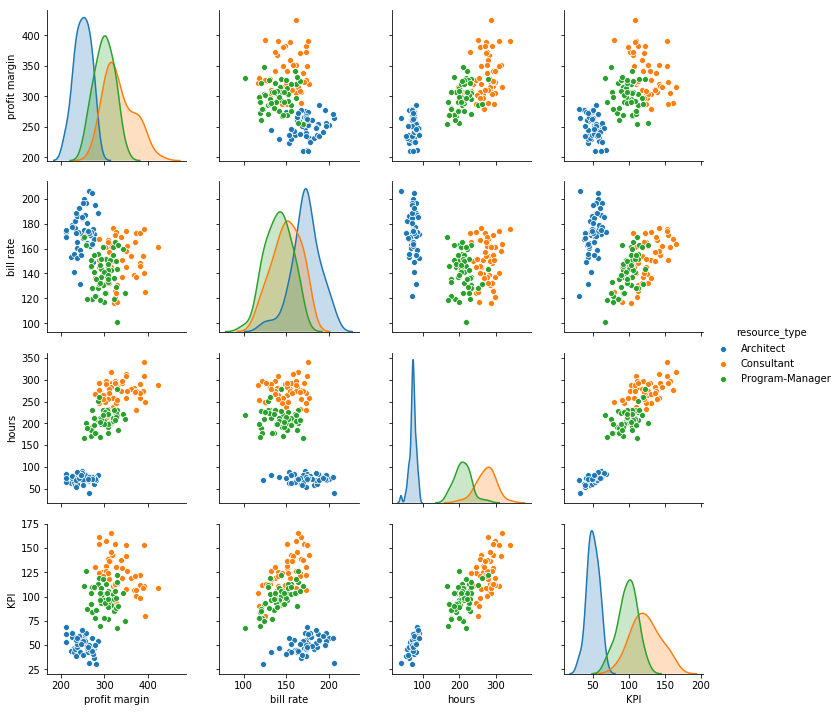

In [24]:
sns.pairplot(kpi_df, hue="resource_type")

In [26]:
inputs = kpi_df[['profit margin', 'bill rate', 'hours', 'KPI']]
outputs = kpi_df[['resource_type']]

In [27]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [28]:
knn.fit(inputs, outputs)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
knn.predict([[255, 175, 70, 10]])

array(['Architect'], dtype=object)

In [33]:
knn.predict(inputs)

array(['Architect', 'Architect', 'Architect', 'Architect', 'Architect',
       'Architect', 'Architect', 'Architect', 'Architect', 'Architect',
       'Architect', 'Architect', 'Architect', 'Architect', 'Architect',
       'Architect', 'Architect', 'Architect', 'Architect', 'Architect',
       'Architect', 'Architect', 'Architect', 'Architect', 'Architect',
       'Architect', 'Architect', 'Architect', 'Architect', 'Architect',
       'Architect', 'Architect', 'Architect', 'Architect', 'Architect',
       'Architect', 'Architect', 'Architect', 'Architect', 'Architect',
       'Architect', 'Architect', 'Architect', 'Architect', 'Architect',
       'Architect', 'Architect', 'Architect', 'Architect', 'Architect',
       'Consultant', 'Consultant', 'Consultant', 'Consultant',
       'Consultant', 'Consultant', 'Consultant', 'Consultant',
       'Consultant', 'Consultant', 'Consultant', 'Program-Manager',
       'Consultant', 'Consultant', 'Consultant', 'Consultant',
       'Consultant', 'C

In [34]:
outputs

,resource_type
0,Architect
1,Architect
2,Architect
3,Architect
4,Architect
5,Architect
6,Architect
7,Architect
8,Architect
9,Architect


In [35]:
knn.predict(inputs).shape

(150,)

In [36]:
outputs.shape

(150, 1)